In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('data/coin_gecko_2022-03-16.csv')
df2 = pd.read_csv('data/coin_gecko_2022-03-17.csv')
df = pd.concat([df1, df2], ignore_index=True)  # Combine both
eda_df = df.dropna(subset=['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap'])  # Clean

In [5]:
print(df.describe())   #Summary Statistics

              price          1h         24h          7d    24h_volume  \
count  1.000000e+03  993.000000  993.000000  992.000000  9.930000e+02   
mean   6.561060e+02    0.009723    0.023737    0.023558  2.893109e+08   
std    4.584655e+03    0.026934    0.059303    0.229781  2.769908e+09   
min    1.484000e-09   -0.704000   -0.646000   -0.558000  0.000000e+00   
25%    1.940547e-01    0.001000    0.001000   -0.041000  1.766976e+06   
50%    1.095000e+00    0.006000    0.016000   -0.000500  8.343005e+06   
75%    7.232500e+00    0.019000    0.035000    0.037000  4.003652e+07   
max    4.121727e+04    0.095000    0.577000    4.608000  5.793497e+10   

            mkt_cap  
count  1.000000e+03  
mean   3.755304e+09  
std    3.803783e+10  
min    6.577043e+07  
25%    1.157776e+08  
50%    2.120036e+08  
75%    5.948436e+08  
max    7.760774e+11  


In [7]:
print(df.isnull().sum())   #Missing Values

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64


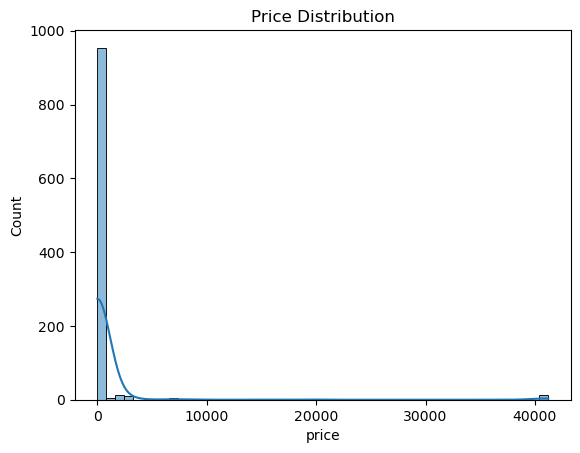

In [11]:
sns.histplot(df['price'], bins=50, kde=True) #Distributions
plt.title("Price Distribution")
plt.show()

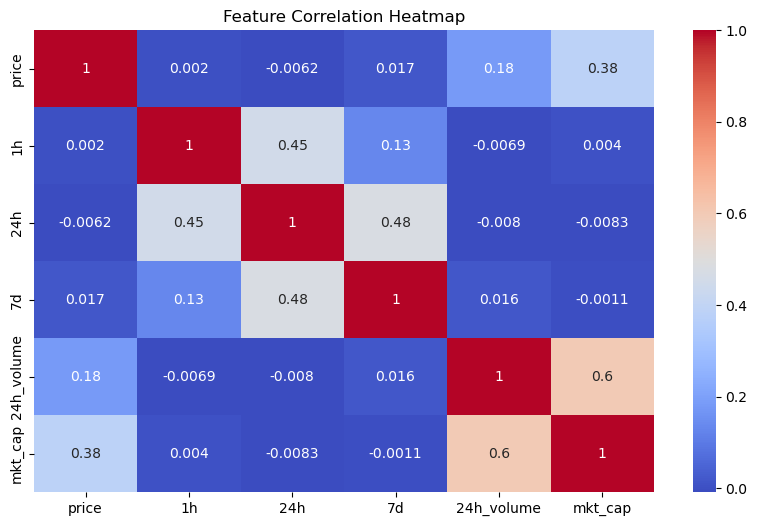

In [17]:
corr_matrix = eda_df.select_dtypes(include='number').corr()   # correlation heat map Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

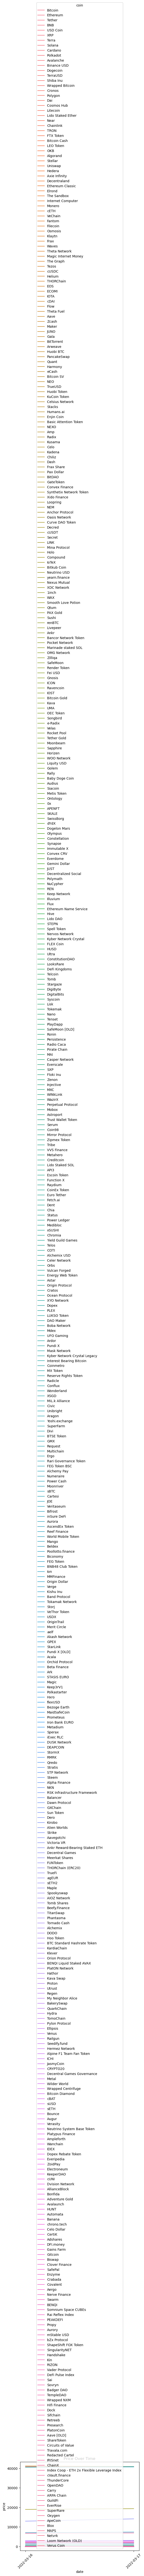

In [20]:
sns.lineplot(data=df, x='date', y='price', hue='coin')    # Time Series Trends (if multi-day)
plt.xticks(rotation=45)
plt.title("Price Over Time")
plt.show()


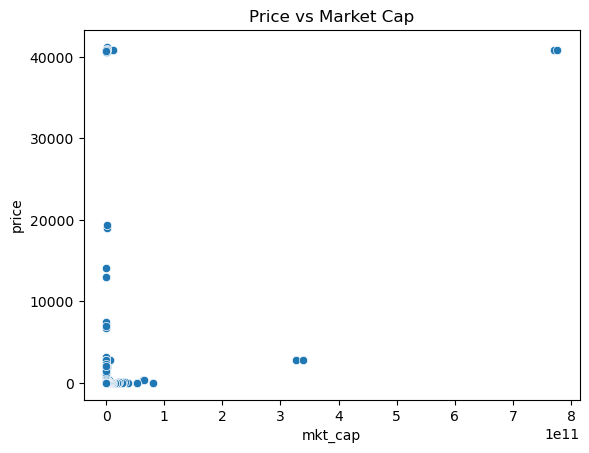

In [22]:
sns.scatterplot(x='mkt_cap', y='price', data=df)  #Price vs Volume/Market Cap
plt.title("Price vs Market Cap")
plt.show()
